RAG With Multi Data Source

In [103]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [104]:
api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [105]:
wiki.name

'wikipedia'

In [106]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_ollama import OllamaEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

loader=WebBaseLoader("https://docs.smith.langchain.com/")
docs=loader.load()

documents=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200).split_documents(docs)
vectordb=FAISS.from_documents(documents,OllamaEmbeddings(model="nomic-embed-text"))
retriever=vectordb.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001AB7C635F70>, search_kwargs={})

In [107]:
from langchain_core.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(retriever, "langsmith_search",
                                     "Search for information about LangSmith. for any questions about LangSmith, you must use this tool!")

In [108]:
retriever_tool.name

'langsmith_search'

In [109]:
# Arxiv Tool
from langchain_community.utilities import ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun

arxiv_wrapper= ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)
arxiv.name

'arxiv'

In [110]:
tools = [wiki, arxiv,retriever_tool]

In [111]:
tools

[WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Users\\Mohd Amaan\\anaconda3\\envs\\MYENV\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=200)),
 ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=1, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=200)),
 Tool(name='langsmith_search', description='Search for information about LangSmith. for any questions about LangSmith, you must use this tool!', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001AB7793D4E0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchai

In [112]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq
import os

load_dotenv()  

os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0.7)


In [113]:
# from langchain_classic import hub
from langchain_core.prompts import PromptTemplate
# Get the prompt to use - you can modify this!
# This is supercool - you can pull prompts from LangChain Hub!
# But we can not use it directly with Ollama LLMs yet. we can use it for other LLMs like OpenAI, etc.
# prompt = hub.pull("hwchase17/openai-functions-agent")

prompt = PromptTemplate(
    input_variables=["input"],
    template="You are a helpful assistant. Think step-by-step.\nHuman: {input}\nAssistant:"
)


C:\Users\Mohd Amaan\AppData\Local\Temp\ipykernel_17280\2107516925.py:4: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(


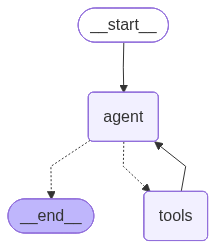

In [102]:
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import Tool

agent = create_react_agent(
    model=llm,
    tools=tools,
    prompt=prompt
)
agent

In [ ]:
result = agent.invoke({"input": "Tell me about LangSmith"})
